In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
# from tensorflow.keras.optimizers import Adam

## Read in data and split into train and test

In [150]:
# Read in the data
heart_data = pd.read_csv("heart.csv").drop(columns=["row.names"])

# Label encode the famhist column
le = LabelEncoder()
le.fit(heart_data["famhist"])
heart_data["famhist"] = le.transform(heart_data["famhist"])

# split the data
train, test = train_test_split(heart_data, test_size=0.20, random_state=1)

# Save the train and test into csvs
train.to_csv("heart_train.csv")
test.to_csv("heart_test.csv")

# Features and labels for the training
X_train = train.drop(columns=["chd"]).values
y_train = train["chd"].values.astype(float)

# Features and labels for the testing
X_test = test.drop(columns=["chd"]).values
y_test = test["chd"].values.astype(float)

#normalize the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Build a DNN that will overfit

In [270]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=9))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [271]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.15, verbose=1)

Train on 313 samples, validate on 56 samples
Epoch 1/100
313/313 [==============================] - 1s 2ms/sample - loss: 0.6159 - acc: 0.6358 - val_loss: 0.6657 - val_acc: 0.6250
Epoch 2/100
313/313 [==============================] - 0s 209us/sample - loss: 0.5400 - acc: 0.7412 - val_loss: 0.6679 - val_acc: 0.6250
Epoch 3/100
313/313 [==============================] - 0s 186us/sample - loss: 0.5173 - acc: 0.7668 - val_loss: 0.6694 - val_acc: 0.6071
Epoch 4/100
313/313 [==============================] - 0s 231us/sample - loss: 0.5012 - acc: 0.7732 - val_loss: 0.6605 - val_acc: 0.6071
Epoch 5/100
313/313 [==============================] - 0s 220us/sample - loss: 0.4860 - acc: 0.7827 - val_loss: 0.6500 - val_acc: 0.6250
Epoch 6/100
313/313 [==============================] - 0s 267us/sample - loss: 0.4761 - acc: 0.7796 - val_loss: 0.6513 - val_acc: 0.6250
Epoch 7/100
313/313 [==============================] - 0s 211us/sample - loss: 0.4671 - acc: 0.7859 - val_loss: 0.6546 - val_acc: 0.625

313/313 [==============================] - 0s 150us/sample - loss: 0.1614 - acc: 0.9585 - val_loss: 1.1320 - val_acc: 0.5357
Epoch 61/100
313/313 [==============================] - 0s 325us/sample - loss: 0.1569 - acc: 0.9649 - val_loss: 1.1552 - val_acc: 0.5357
Epoch 62/100
313/313 [==============================] - 0s 242us/sample - loss: 0.1543 - acc: 0.9617 - val_loss: 1.1534 - val_acc: 0.5536
Epoch 63/100
313/313 [==============================] - 0s 232us/sample - loss: 0.1533 - acc: 0.9649 - val_loss: 1.1739 - val_acc: 0.5357
Epoch 64/100
313/313 [==============================] - 0s 130us/sample - loss: 0.1472 - acc: 0.9681 - val_loss: 1.2320 - val_acc: 0.5357
Epoch 65/100
313/313 [==============================] - 0s 159us/sample - loss: 0.1428 - acc: 0.9649 - val_loss: 1.2009 - val_acc: 0.5357
Epoch 66/100
313/313 [==============================] - 0s 203us/sample - loss: 0.1371 - acc: 0.9712 - val_loss: 1.2354 - val_acc: 0.5357
Epoch 67/100
313/313 [=========================

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


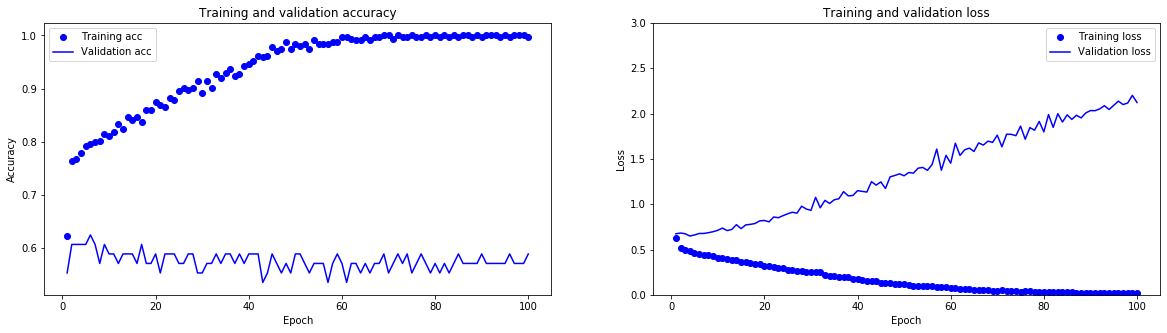

In [191]:
plot_training_results(history)

## Make changes to avoid overfitting the model

In [276]:
better_model = Sequential()
better_model.add(Dense(128, activation="relu", input_dim=9, kernel_regularizer=regularizers.l1(0.001)))
better_model.add(Dropout(0.3))
better_model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
better_model.add(Dropout(0.3))
better_model.add(Dense(1, activation="sigmoid"))

better_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [277]:
history_better = better_model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.15, verbose=1)

Train on 313 samples, validate on 56 samples
Epoch 1/80
313/313 [==============================] - 1s 3ms/sample - loss: 1.9957 - acc: 0.6422 - val_loss: 1.9704 - val_acc: 0.5893
Epoch 2/80
313/313 [==============================] - 0s 220us/sample - loss: 1.8542 - acc: 0.7029 - val_loss: 1.8931 - val_acc: 0.5357
Epoch 3/80
313/313 [==============================] - 0s 634us/sample - loss: 1.7654 - acc: 0.7188 - val_loss: 1.8192 - val_acc: 0.5893
Epoch 4/80
313/313 [==============================] - 0s 237us/sample - loss: 1.6686 - acc: 0.7540 - val_loss: 1.7484 - val_acc: 0.5893
Epoch 5/80
313/313 [==============================] - 0s 278us/sample - loss: 1.5830 - acc: 0.7604 - val_loss: 1.6752 - val_acc: 0.6250
Epoch 6/80
313/313 [==============================] - 0s 231us/sample - loss: 1.5161 - acc: 0.7732 - val_loss: 1.6161 - val_acc: 0.5893
Epoch 7/80
313/313 [==============================] - 0s 240us/sample - loss: 1.4403 - acc: 0.7764 - val_loss: 1.5551 - val_acc: 0.5893
Epoch

313/313 [==============================] - 0s 219us/sample - loss: 0.5849 - acc: 0.7955 - val_loss: 0.7749 - val_acc: 0.5893
Epoch 61/80
313/313 [==============================] - 0s 233us/sample - loss: 0.5764 - acc: 0.7923 - val_loss: 0.7744 - val_acc: 0.5893
Epoch 62/80
313/313 [==============================] - 0s 208us/sample - loss: 0.5810 - acc: 0.7859 - val_loss: 0.7693 - val_acc: 0.5893
Epoch 63/80
313/313 [==============================] - 0s 210us/sample - loss: 0.5810 - acc: 0.7987 - val_loss: 0.7823 - val_acc: 0.6250
Epoch 64/80
313/313 [==============================] - 0s 210us/sample - loss: 0.5649 - acc: 0.7923 - val_loss: 0.7697 - val_acc: 0.5893
Epoch 65/80
313/313 [==============================] - 0s 236us/sample - loss: 0.5828 - acc: 0.7827 - val_loss: 0.7702 - val_acc: 0.5893
Epoch 66/80
313/313 [==============================] - 0s 169us/sample - loss: 0.5749 - acc: 0.7987 - val_loss: 0.7782 - val_acc: 0.5893
Epoch 67/80
313/313 [==============================] 

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


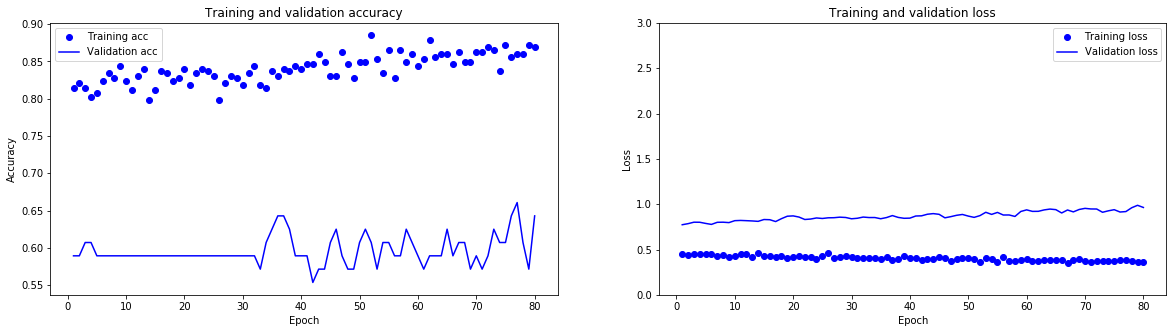

In [267]:
plot_training_results(history_better)

In [262]:
def plot_training_results(history_obj):
    acc = history_obj.history['acc']
    val_acc = history_obj.history['val_acc']
    loss = history_obj.history['loss']
    val_loss = history_obj.history['val_loss']
    
    epochs = range(1, len(acc) + 1)

    fig, (accuracy_axis, loss_axis) = plt.subplots(1, 2, figsize=(20, 5))

    accuracy_axis.plot(epochs, acc, 'bo', label='Training acc')
    accuracy_axis.plot(epochs, val_acc, 'b', label='Validation acc')
    accuracy_axis.set_title('Training and validation accuracy')
    accuracy_axis.set_ylabel('Accuracy')
    accuracy_axis.set_xlabel('Epoch')
    accuracy_axis.legend()

    loss_axis.plot(epochs, loss, 'bo', label='Training loss')
    loss_axis.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_axis.set_title('Training and validation loss')
    loss_axis.set_ylim(0, 3)
    loss_axis.set_ylabel('Loss')
    loss_axis.set_xlabel('Epoch')
    loss_axis.legend()
    fig.show()